In [89]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids
from factor_analyzer import FactorAnalyzer

from prince import FAMD

import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [91]:
#finding count of missing values in each column
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [92]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Liver_disease']
## RENAMED RESULT AS Liver_disease
# Renaming Done
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [93]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)

#recoding Liver_disease variable - 2 means dont have disease - converted that to 0; 1 remains the same
df['Liver_disease'] = df['Liver_disease'].replace(2, 0)
print(df["Liver_disease"].unique())

[1 2]
[1 0]


In [94]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()
df['is_male'] = LabelEncoder.fit_transform(df['Gender'])
df = df.drop(columns='Gender')
df =  df.rename(columns={'is_male':'Gender'}, inplace=False)

#new gender column where male=1 and female=0

In [95]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Liver_disease,Gender
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,1
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,1
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,1
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,1


In [96]:
#dropping null values - does not affect data
df = df.dropna()
#finding count of missing values in each column
df.isna().sum()

Age                                     0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Liver_disease                           0
Gender                                  0
dtype: int64

In [97]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [98]:
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total persons with liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons without liver disease :  7833 and its percentage is 28.31 %
Total persons with liver disease :  19833 and its percentage is 71.69 %


TEST TRAIN SPLIT

In [99]:
X = df.drop(columns=['Liver_disease'])
y = df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [100]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

DOWNSAMPLING 

In [101]:
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )
print ('Total persons with liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[1], round(df.Liver_disease.value_counts()[1]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons without liver disease :  7833 and its percentage is 28.31 %
Total persons with liver disease :  19833 and its percentage is 71.69 %


In [102]:
X = df.drop(columns=['Liver_disease'])
y = df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [103]:
#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)

In [104]:
X_train.shape

(22132, 10)

In [105]:
y_train.shape

(22132,)

In [106]:
X_test.shape

(5534, 10)

In [107]:
y_test.shape

(5534,)

In [108]:
import numpy as np
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = X_train[y_train == 1]
minority_class = X_train[y_train == 0]

# Print sizes of majority and minority classes before upsampling
print("Size of majority class before downsampling:", majority_class.shape[0])
print("Size of minority class before downsampling:", minority_class.shape[0])

# Now you can use X_upsampled and y_upsampled for training your model

Size of majority class before downsampling: 15855
Size of minority class before downsampling: 6277


In [109]:
from sklearn.utils import resample


# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,     # Sample without replacement
                                n_samples=minority_class.shape[0],  # Match number in minority class
                                random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
X_downsampled = np.vstack([minority_class, majority_downsampled])
y_downsampled = np.concatenate([np.zeros(minority_class.shape[0]), np.ones(minority_class.shape[0])])

# Shuffle the data
shuffle_indices = np.arange(len(X_downsampled))
np.random.shuffle(shuffle_indices)
X_downsampled = X_downsampled[shuffle_indices]
y_downsampled = y_downsampled[shuffle_indices]



# Print the class counts after downsampling
unique_classes, class_counts = np.unique(y_downsampled, return_counts=True)
print("Class counts after downsampling:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {int(cls)}: {count}")

# Now you can use X_downsampled and y_downsampled for training your model


Class counts after downsampling:
Class 0: 6277
Class 1: 6277


In [110]:

#class distribution before and after DOWNSAMPLING



X_resampled_train = pd.DataFrame(X_downsampled)
y_resampled_train = pd.DataFrame(y_downsampled)


print("Before DOWNSAMPLING:")
print(np.unique(y_train, return_counts=True))
print("After DOWNSAMPLING:")
print(np.unique(y_resampled_train, return_counts=True))

Before DOWNSAMPLING:
(array([0, 1], dtype=int64), array([ 6277, 15855], dtype=int64))
After DOWNSAMPLING:
(array([0., 1.]), array([6277, 6277], dtype=int64))


In [111]:
import numpy as np

# Class distribution before upsampling
print("Before Downsampling:")
unique_labels_before, counts_before = np.unique(y_train, return_counts=True)
total_persons_no_liver_disease_before = counts_before[0]
total_persons_with_liver_disease_before = counts_before[1]
print("Total persons without liver disease:", total_persons_no_liver_disease_before)
print("Total persons with liver disease:", total_persons_with_liver_disease_before)

# Class distribution after upsampling
print("After Downsampling:")
unique_labels_after, counts_after = np.unique(y_resampled_train, return_counts=True)
total_persons_no_liver_disease_after = counts_after[0]
total_persons_with_liver_disease_after = counts_after[1]
print("Total persons without liver disease:", total_persons_no_liver_disease_after)
print("Total persons with liver disease:", total_persons_with_liver_disease_after)


Before Downsampling:
Total persons without liver disease: 6277
Total persons with liver disease: 15855
After Downsampling:
Total persons without liver disease: 6277
Total persons with liver disease: 6277


In [112]:
X_train_shape = X_train.shape
print("Shape of X_train:", X_train_shape)
y_train_shape = y_train.shape
print("Shape of y_train:", y_train_shape)



Shape of X_train: (22132, 10)
Shape of y_train: (22132,)


****** BEST MODEL 3 *****

DOWNSAMPLING: RF : ACCURACY 0.9998


In [74]:
np.random.seed(28)

rf = RandomForestClassifier(random_state=28)
param_grid = {
    'n_estimators': [50, 60, 70, 80, 90, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}
0.9998407009159698


In [113]:
rf = RandomForestClassifier(n_estimators=90, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=28)
rf.fit(X_resampled_train,y_resampled_train)
y_pred = rf.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_test != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.98 %
Misclassification rate of this model:  0.02 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


In [114]:
rf = RandomForestClassifier(n_estimators=90, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=28)
rf.fit(X_resampled_train,y_resampled_train)
y_pred = rf.predict(X_train)

accuracy = round(metrics.accuracy_score(y_train, y_pred)*100, 2)
print("Accuracy score of this model: ", accuracy, "%") 

misclassification_rate = round(np.mean(y_train != y_pred)*100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

print("\nReport card of this model: ")
print(metrics.classification_report(y_train, y_pred, digits=3))

conf_matrix = metrics.confusion_matrix(y_train, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)

Accuracy score of this model:  99.99 %
Misclassification rate of this model:  0.01 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6277
           1      1.000     1.000     1.000     15855

    accuracy                          1.000     22132
   macro avg      1.000     1.000     1.000     22132
weighted avg      1.000     1.000     1.000     22132

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 6275 |                    2 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    1 |                15854 |
+-----------------+----------------------+----------------------+


In [115]:
 X_resampled_train.columns

RangeIndex(start=0, stop=10, step=1)

In [116]:
 X_train.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')

In [117]:
 X_test.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')

In [122]:
# Define the new column names
new_column_names = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Gender']

# Change column names of X_resampled_train
X_resampled_train.columns = new_column_names

# Print the new column names
print("New column names of X_resampled_train:")
print(X_resampled_train.columns)


New column names of X_resampled_train:
Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')


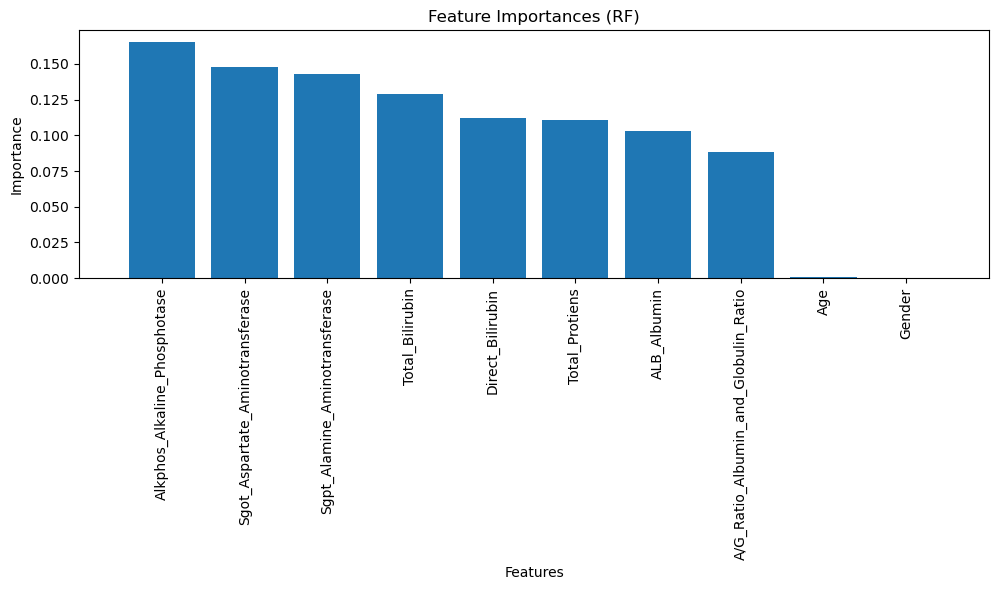

In [123]:
# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
# Get feature importances from the trained model
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (RF)")
plt.bar(range(X_resampled_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_resampled_train.shape[1]), sorted_feature_names, rotation=90)
plt.xlim([-1, X_resampled_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [124]:
sorted_feature_names

['Alkphos_Alkaline_Phosphotase',
 'Sgot_Aspartate_Aminotransferase',
 'Sgpt_Alamine_Aminotransferase',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Total_Protiens',
 'ALB_Albumin',
 'A/G_Ratio_Albumin_and_Globulin_Ratio',
 'Age',
 'Gender']

In [125]:
X_resampled_train

,Age,Total_Bilirubin,Direct_Bilirubin,Alkphos_Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,Total_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,Gender
0,46.0,15.8,7.2,227.0,67.0,220.0,6.9,2.6,0.60,1.0
1,72.0,0.9,0.3,293.0,232.0,245.0,6.8,3.1,0.80,1.0
2,66.0,0.9,0.2,265.0,40.0,28.0,8.0,4.0,1.00,1.0
3,33.0,2.0,0.9,157.0,54.0,68.0,6.1,2.7,0.80,1.0
4,6.0,0.9,0.3,194.0,190.0,73.0,7.5,3.9,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...
12549,40.0,0.9,0.2,224.0,36.0,45.0,6.9,4.2,1.55,0.0
12550,40.0,0.8,0.2,199.0,34.0,31.0,6.5,3.5,1.16,2.0
12551,28.0,0.9,0.2,401.0,25.0,58.0,7.5,3.4,0.80,0.0
12552,62.0,0.8,0.2,140.0,24.0,20.0,6.3,3.2,1.00,1.0


In [134]:
# Get the top 8 important features
top_features = sorted_feature_names[:8]

# Select only the top 8 features from X_train
X_resampled_train_selected = X_resampled_train[top_features]

# Initialize and fit the RandomForestClassifier with the selected features
rf_selected = RandomForestClassifier(n_estimators=90, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=28)
rf_selected.fit(X_resampled_train_selected, y_resampled_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=90, random_state=28)

In [135]:
# Select only the top 8 features from X_test
X_test_selected = X_test[top_features]

# Make predictions using the model trained with the selected features
y_pred = rf_selected.predict(X_test_selected)

# Compute accuracy score
accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Compute misclassification rate
misclassification_rate = round(np.mean(y_test != y_pred) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_test, y_pred, digits=3))

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)


Accuracy score of this model:  99.98 %
Misclassification rate of this model:  0.02 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     0.999     1.000      1556
           1      1.000     1.000     1.000      3978

    accuracy                          1.000      5534
   macro avg      1.000     1.000     1.000      5534
weighted avg      1.000     1.000     1.000      5534

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 1555 |                    1 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                 3978 |
+-----------------+----------------------+----------------------+


In [133]:
# Select only the top 8 features from X_test
X_train_selected = X_train[top_features]

# Make predictions using the model trained with the selected features
y_pred = rf_selected.predict(X_train_selected)

# Compute accuracy score
accuracy = round(metrics.accuracy_score(y_train, y_pred) * 100, 2)
print("Accuracy score of this model: ", accuracy, "%")

# Compute misclassification rate
misclassification_rate = round(np.mean(y_train != y_pred) * 100, 2)
print("Misclassification rate of this model: ", misclassification_rate, "%")

# Print classification report
print("\nReport card of this model: ")
print(metrics.classification_report(y_train, y_pred, digits=3))

# Compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_train, y_pred)
labels = ['Actual Negative', 'Actual Positive']
columns = ['Predicted Negative', 'Predicted Positive']
confusion_table = tabulate(conf_matrix, headers=columns, showindex=labels, tablefmt='grid')
print("Confusion Matrix:")
print(confusion_table)


Accuracy score of this model:  99.99 %
Misclassification rate of this model:  0.01 %

Report card of this model: 
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      6277
           1      1.000     1.000     1.000     15855

    accuracy                          1.000     22132
   macro avg      1.000     1.000     1.000     22132
weighted avg      1.000     1.000     1.000     22132

Confusion Matrix:
+-----------------+----------------------+----------------------+
|                 |   Predicted Negative |   Predicted Positive |
+=================+======================+======================+
| Actual Negative |                 6275 |                    2 |
+-----------------+----------------------+----------------------+
| Actual Positive |                    0 |                15855 |
+-----------------+----------------------+----------------------+
